In [1]:
import pandas as pd

In [2]:
df=pd.read_excel(r"/content/EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df = df.drop(columns=["ID#"])

In [5]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [7]:
df.dtypes

,0
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64
Days_since_enroll,int64


In [8]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [10]:
df.shape

(3998, 11)

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [13]:
z=df.corr()

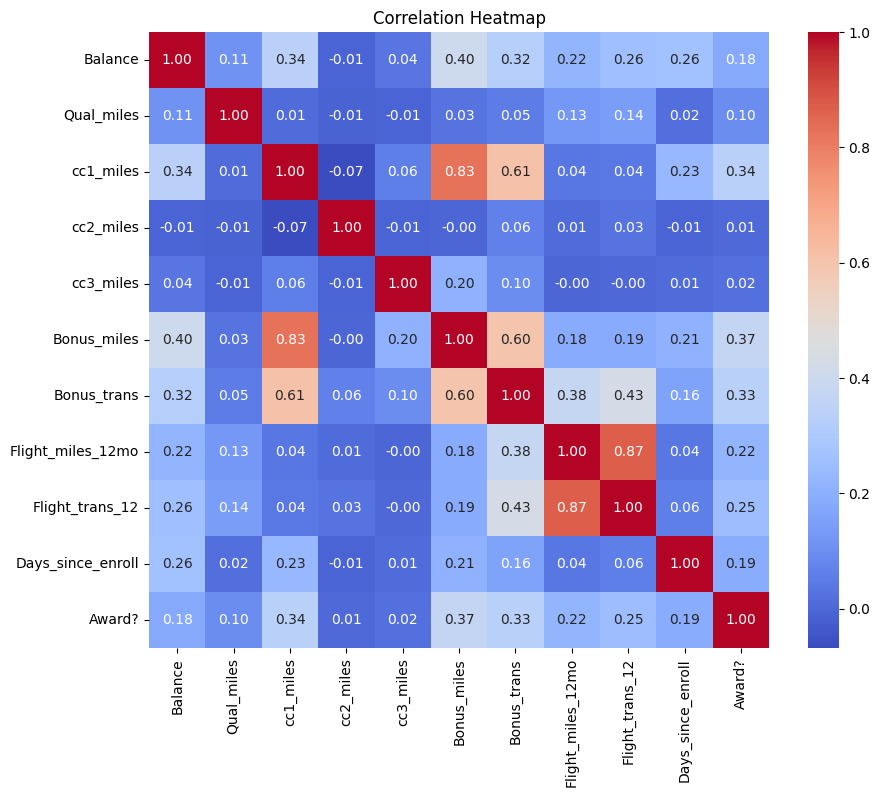

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
#1)Positive correlations (closer to 1): Indicates a strong positive relationship.
#Bonus_miles and cc1_miles have a strong positive correlation (0.83), meaning an increase in one is likely associated with an increase in the other.
#Flight_miles_12mo and Flight_trans_12 also exhibit a strong correlation (0.87).
#Negative correlations (closer to -1): Indicates a strong inverse relationship. However, this heatmap mostly shows weaker negative correlations (values near 0).
#2)Weak or no correlations (close to 0): Indicates little to no linear relationship between features. For instance:
#cc2_miles and Bonus_trans have a correlation near 0 (-0.01), implying almost no relationship.
#3)Highly Correlated Pairs:
#Bonus_miles and cc1_miles (0.83) suggest that customers who earn more bonus miles are likely using their primary credit card more often.
#Flight_miles_12mo and Flight_trans_12 (0.87) show that frequent travelers have a higher number of transactions.
#4)Moderate Correlations:
#Award? (target variable) has a moderate positive correlation with cc1_miles (0.34) and Bonus_miles (0.37), indicating these features may be useful predictors for awarding customers.
#5)Low Correlations:
#Many features, such as Qual_miles and cc2_miles, show weak correlations with most other variables, implying limited linear relationships.

<Figure size 1200x600 with 0 Axes>

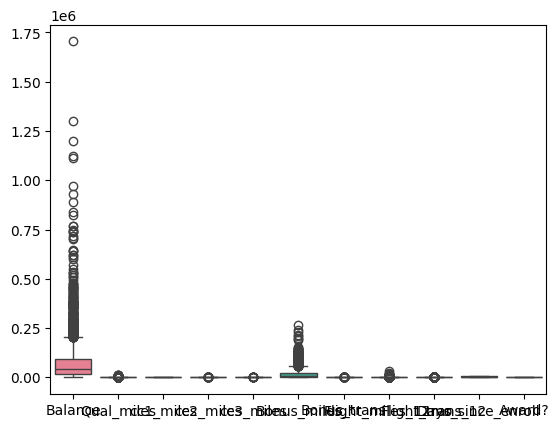

<Figure size 1200x600 with 0 Axes>

In [16]:
sns.boxplot(df)
# Set the style for the plot
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize=(12, 6))

In [17]:
#cc3_miles', 'Qual_miles', 'cc2_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','balance'
#these features are having some of outliers


In [18]:
# List of columns to handle outliers
columns_to_cap = ['cc3_miles', 'Qual_miles', 'cc2_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12']  # Replace with your columns

# Function to cap and floor outliers
def cap_and_floor_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1               # Interquartile range

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping and flooring
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

In [19]:
# Apply the function
df = cap_and_floor_outliers(df, columns_to_cap)

# Display the updated DataFrame
print(df)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1        174.0   
1       19244           0          1          1          1        215.0   
2       41354           0          1          1          1       4123.0   
3       14776           0          1          1          1        500.0   
4       97752           0          4          1          1      43300.0   
...       ...         ...        ...        ...        ...          ...   
3993    18476           0          1          1          1       8525.0   
3994    64385           0          1          1          1        981.0   
3995    73597           0          3          1          1      25447.0   
3996    54899           0          1          1          1        500.0   
3997     3016           0          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

In [20]:
#treating outliers using cap and floor

<Axes: >

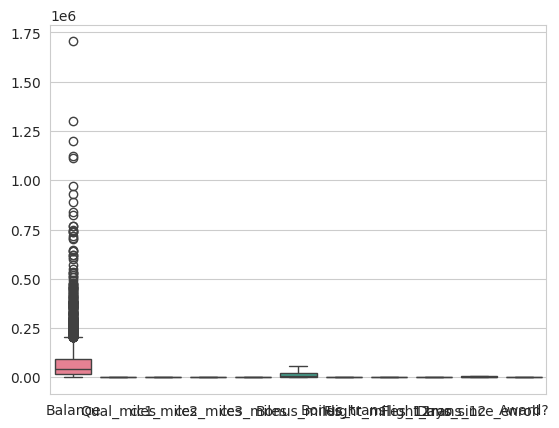

In [21]:
sns.boxplot(df)

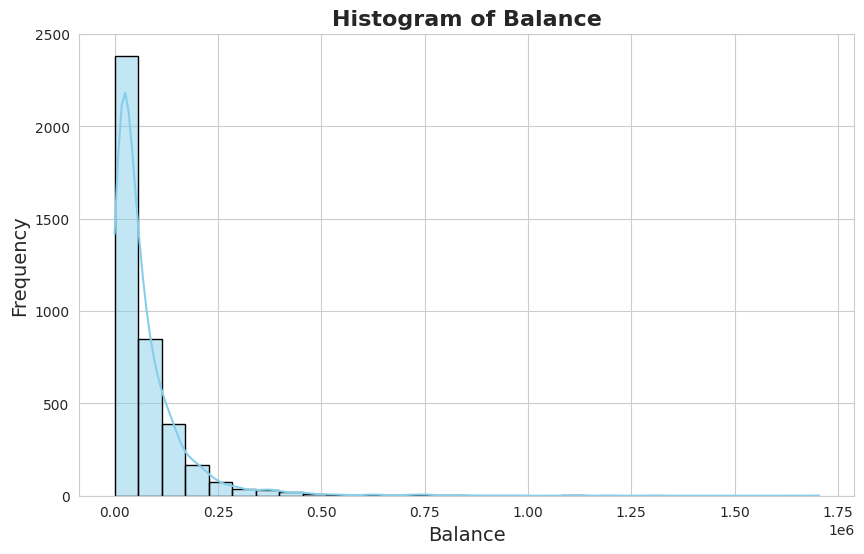

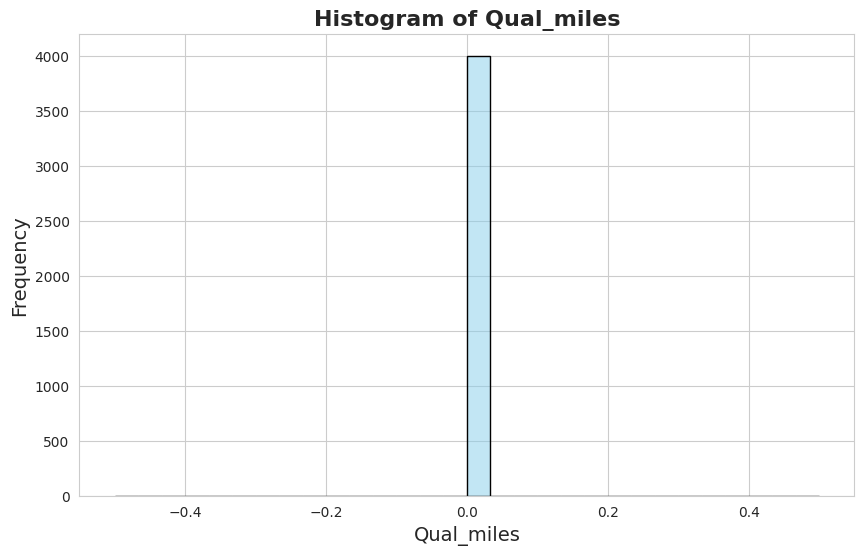

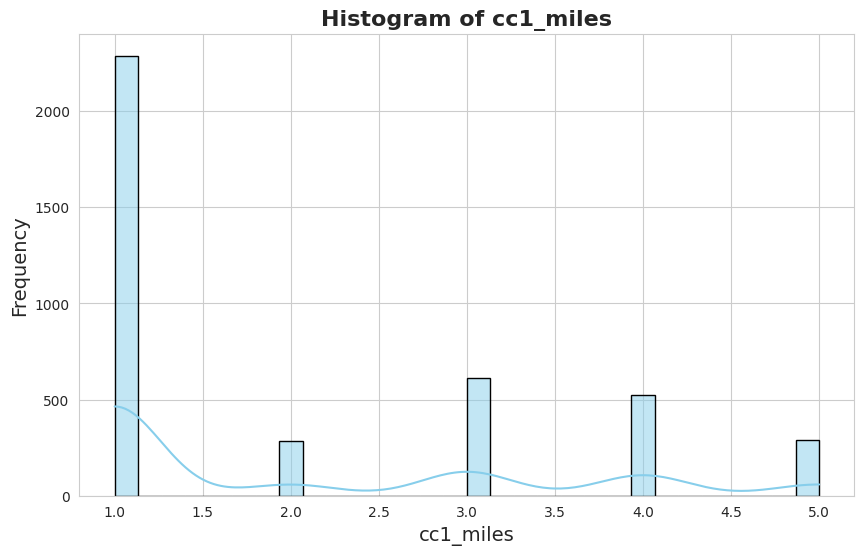

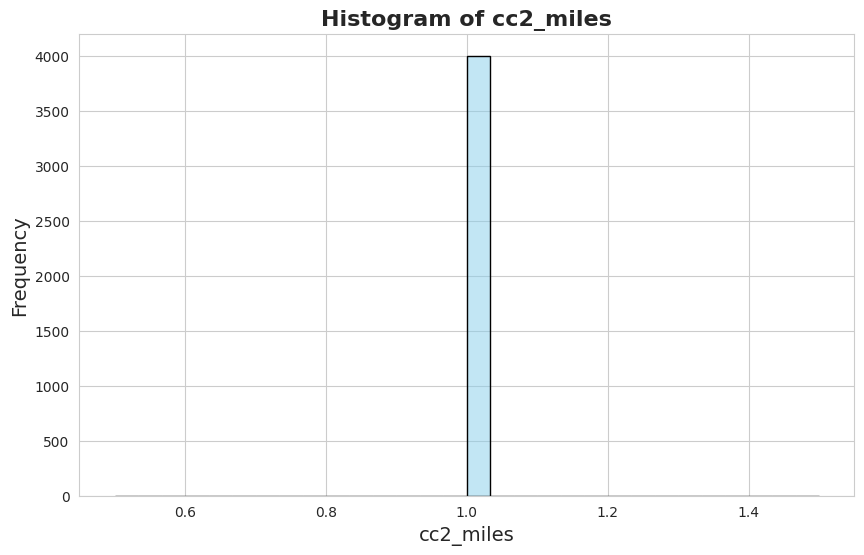

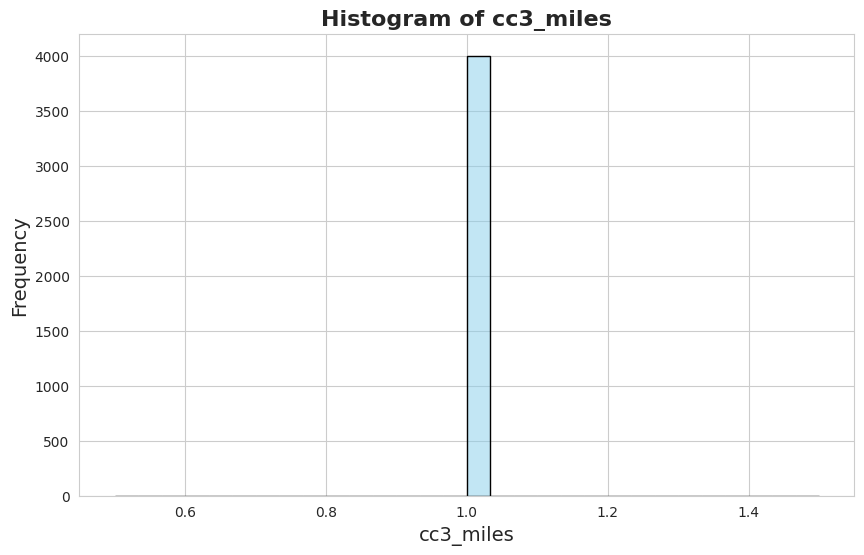

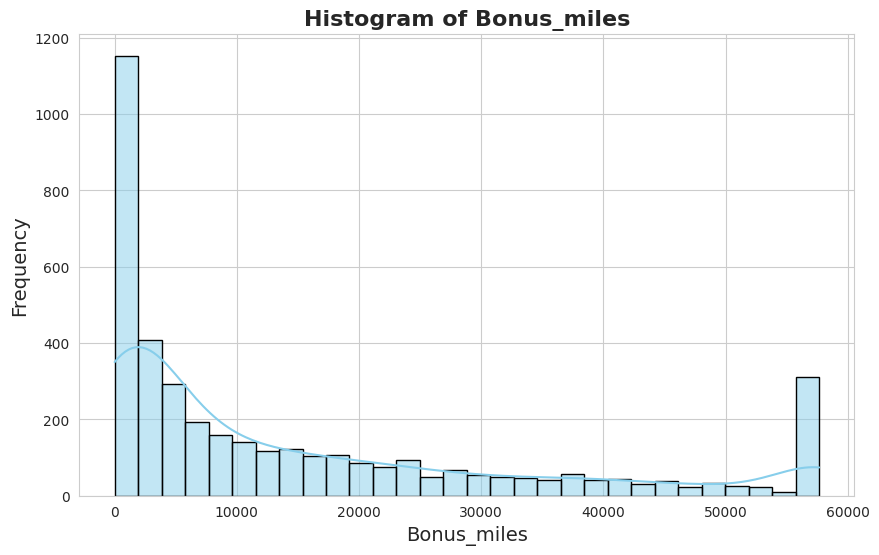

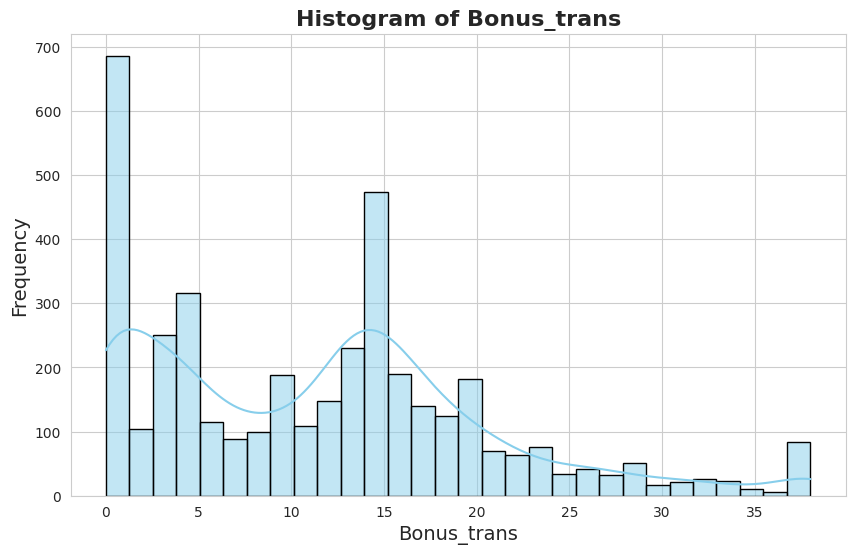

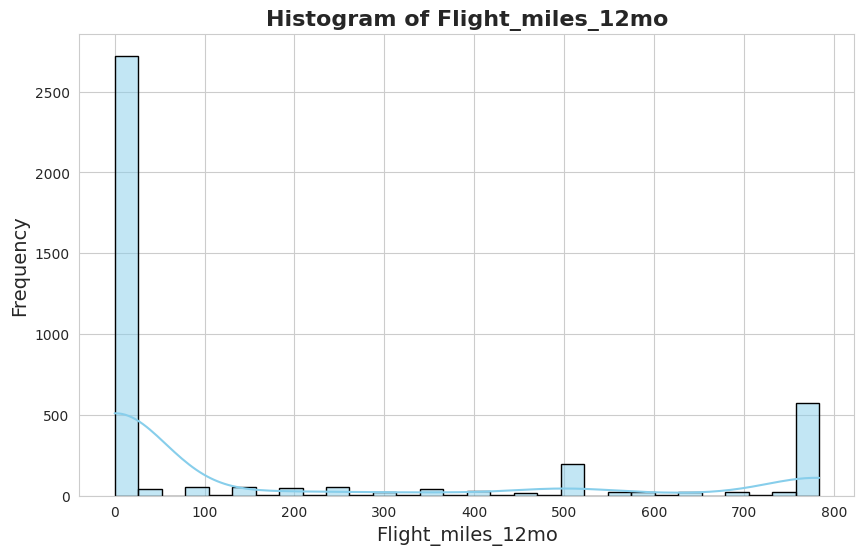

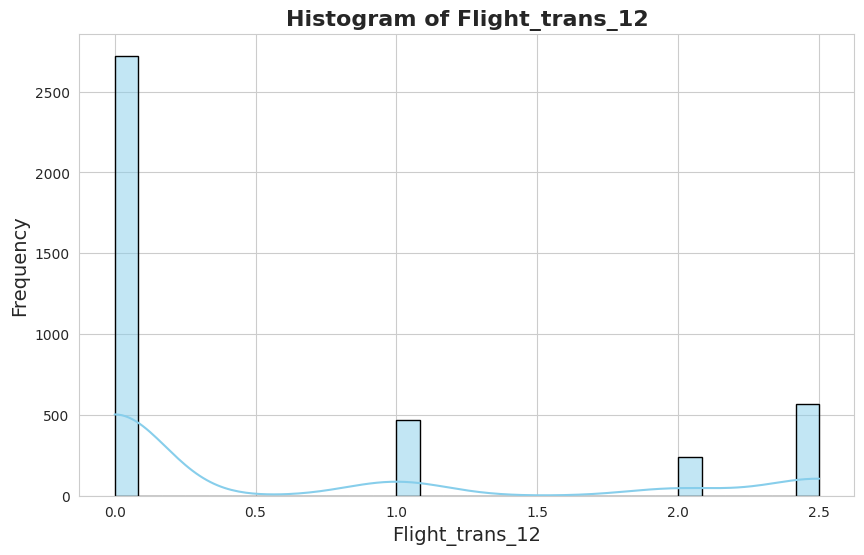

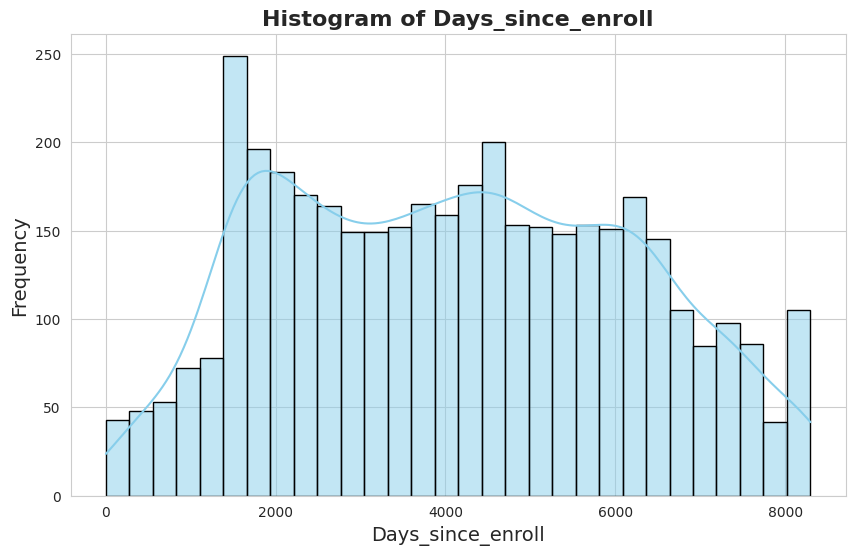

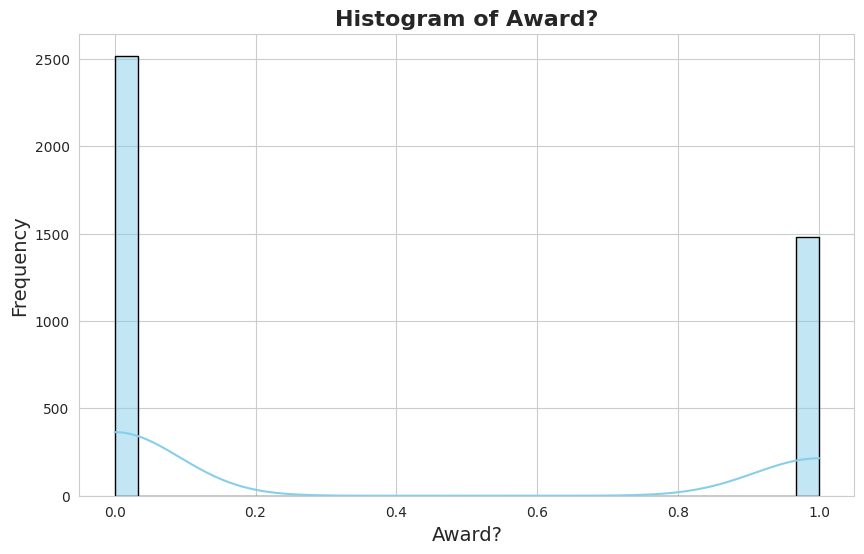

In [22]:
# Set the style
sns.set_style("whitegrid")

# Loop through all columns in the dataset
for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Only numeric columns
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.histplot(
        data=df,
        x=column,
        kde=True,            # Adds a Kernel Density Estimate curve
        bins=30,             # Number of bins
        color='skyblue',     # Set the color of the bars
        edgecolor='black',   # Outline color for better readability
    )
    # Add title and labels
    plt.title(f"Histogram of {column}", fontsize=16, fontweight="bold")
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()

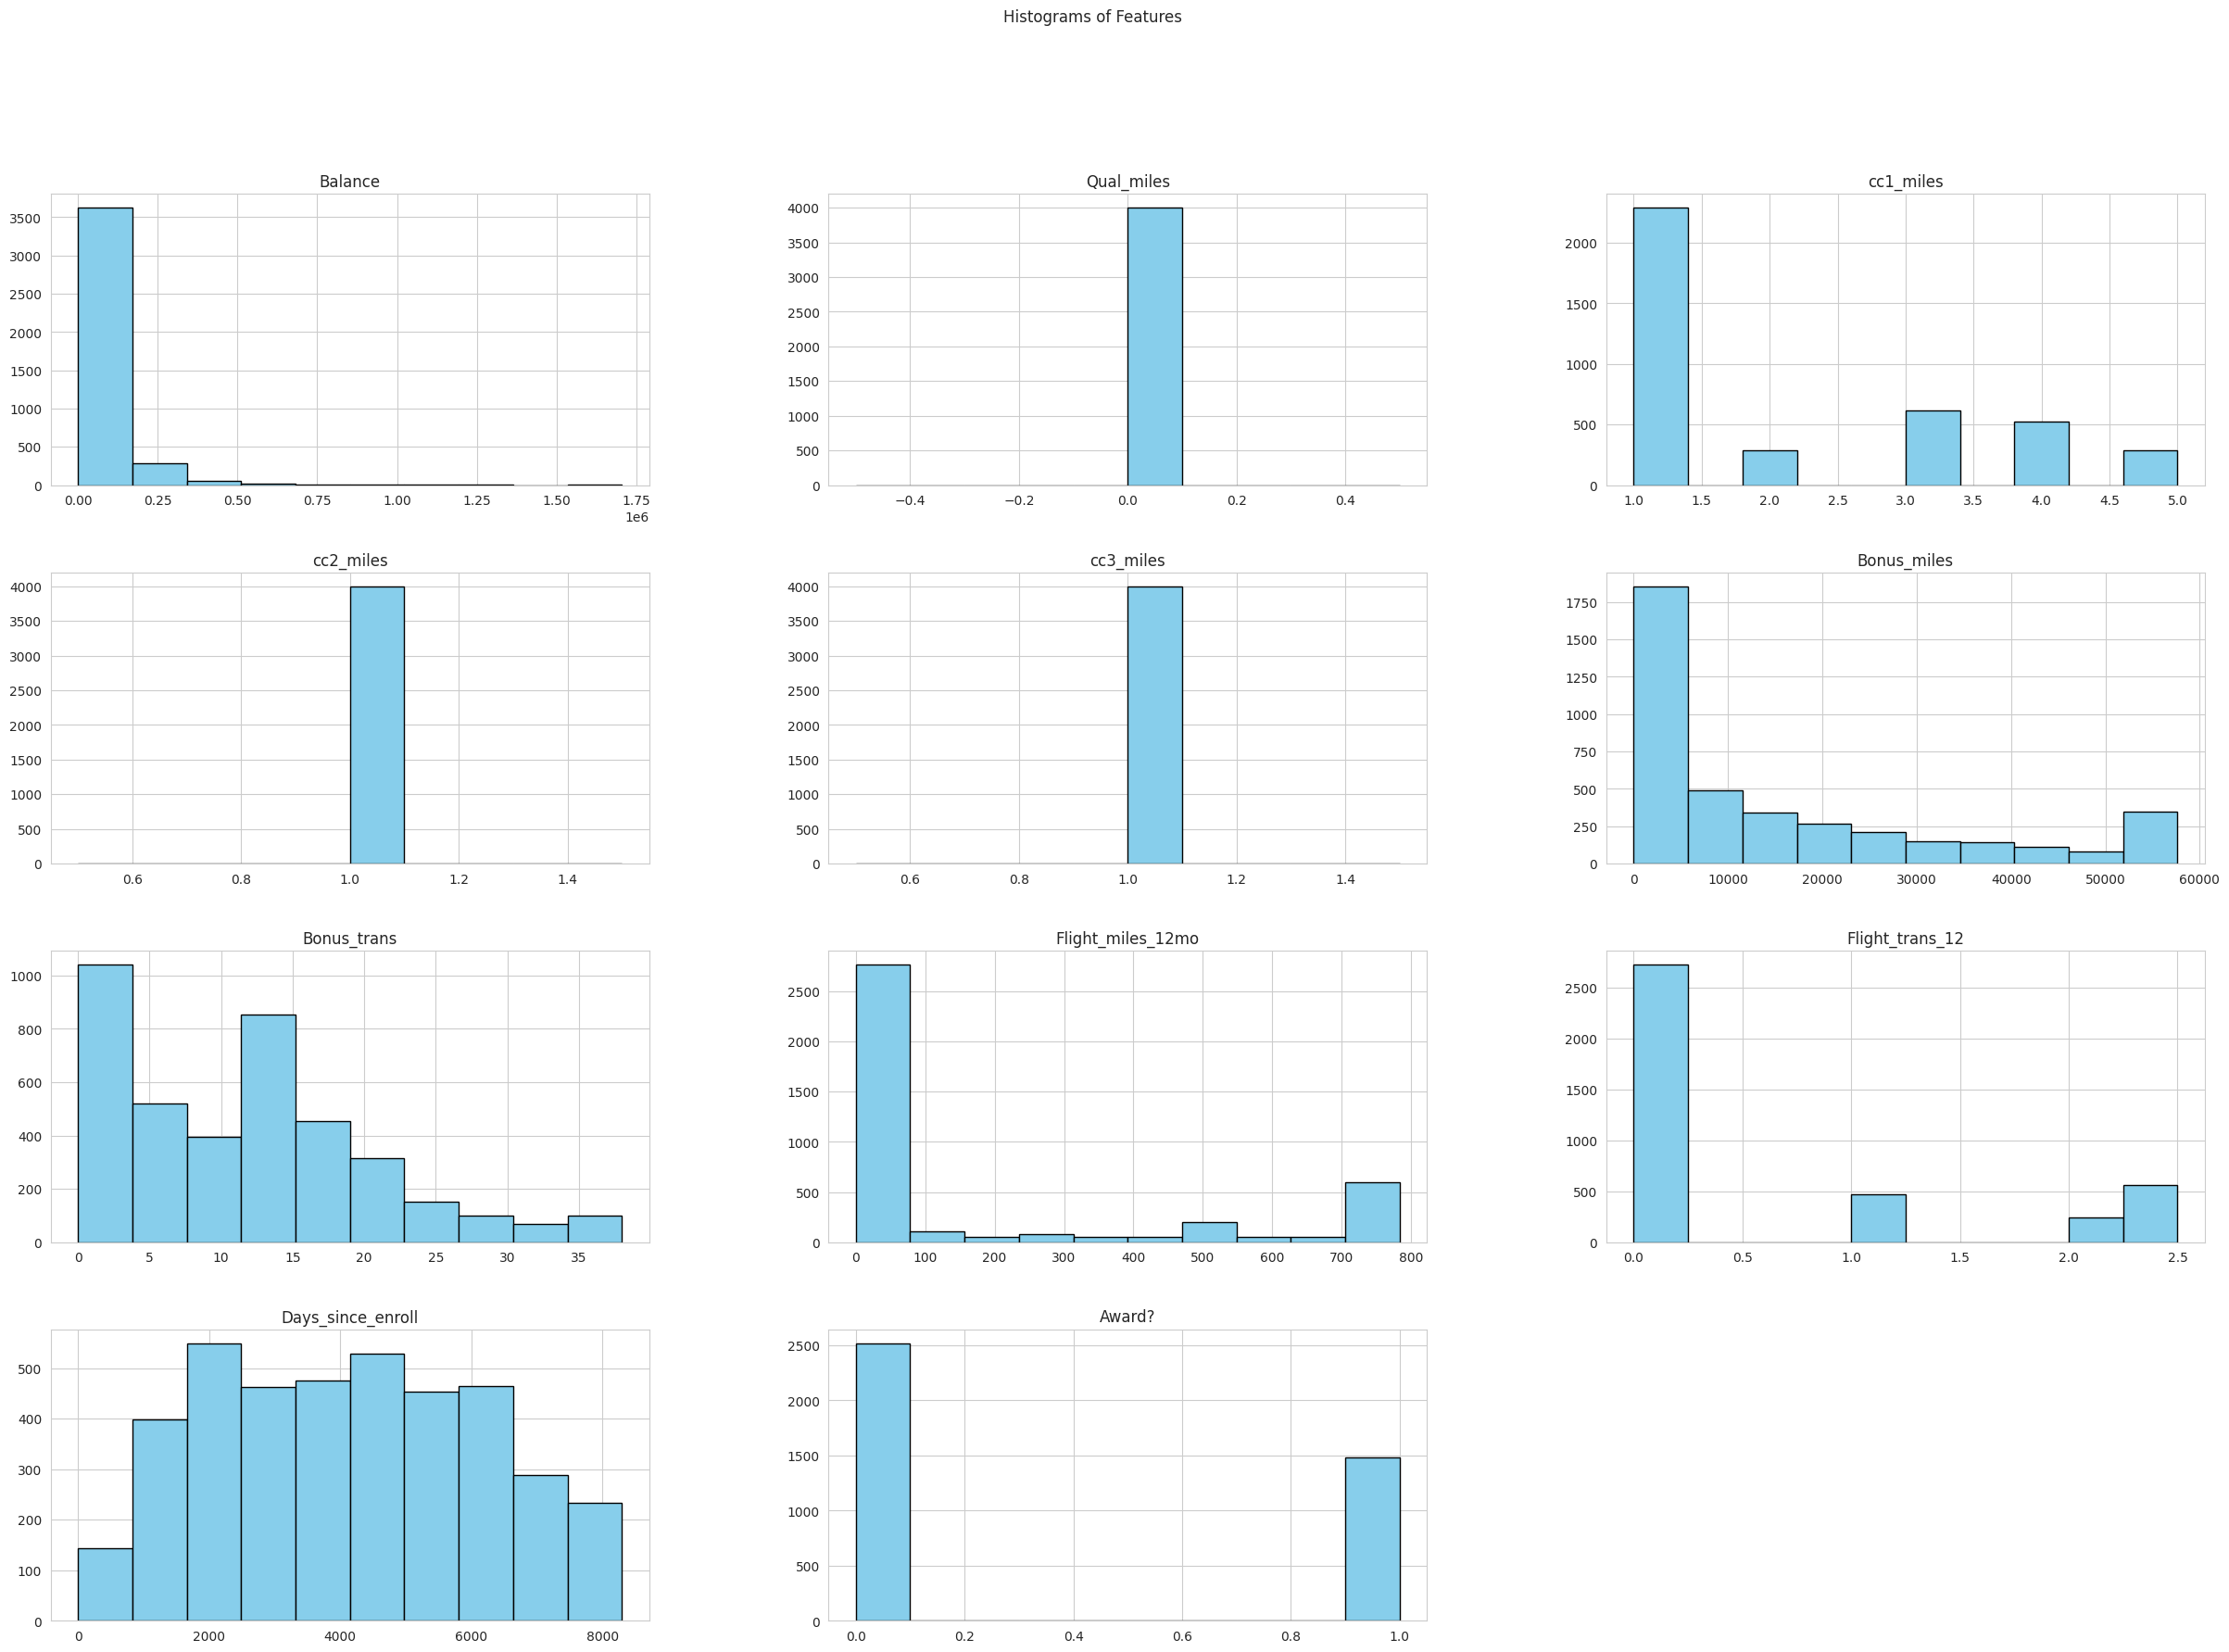

In [23]:
df.hist(bins=10, figsize=(30,20), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
x=df.drop(columns="Award?")

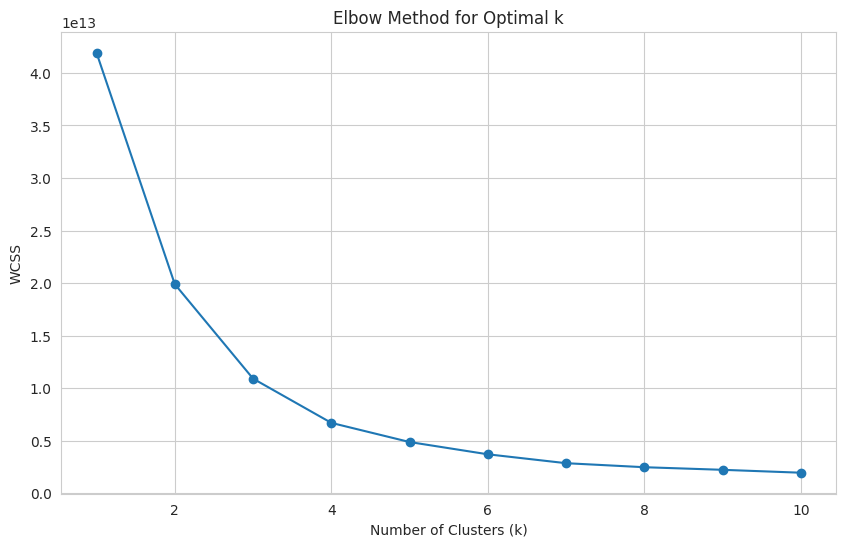

In [26]:
from sklearn.cluster import KMeans
# Calculate WCSS for different values of k (1 to 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the "elbow" point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [27]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)  # Use the same n_clusters as before
kmeans_pca.fit(x)
labels_pca1 = kmeans_pca.labels_

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [29]:
silhouette_pca = silhouette_score(x, labels_pca1)
print(f"Silhouette Score: {silhouette_pca}")

Silhouette Score: 0.7611734902064484


In [30]:
#Interpretation:
#The Silhouette Score ranges from -1 to 1:
#1: Perfect clusters where each data point is well matched to its own cluster and far away from neighboring clusters.
#0: Overlapping clusters, where data points are equidistant between clusters.
#-1: Poor clustering where data points are assigned to the wrong clusters.

#A score of 0.7611:
#Suggests well-separated clusters with minimal overlap.
#Indicates that most data points are closer to the center of their own cluster and far from the centers of other clusters.
#This is a strong score, particularly for high-dimensional datasets, and indicates a meaningful clustering structure.

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [32]:
pca=PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [33]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [34]:
# Performing PCA
pca = PCA(n_components=2)
x_pca1= pca.fit_transform(x)

In [35]:
from scipy.stats import zscore

z_scores = np.abs(zscore(x_pca1))
X_filtered = x_pca1[(z_scores < 3).all(axis=1)]  # Keep points within 3 standard deviations

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_filtered)


In [36]:
dbscan = DBSCAN(eps=4000, min_samples=50,metric='manhattan')  # Adjust `eps` and `min_samples` as needed
dbscan_labels = dbscan.fit_predict(x_pca1)

In [37]:
pca_df1 = pd.DataFrame(data=x_pca1, columns=['Principal Component 1_', 'Principal Component 2_'])
if 'Award?' in df.columns:
    pca_df1['Award?'] = df['Award?']

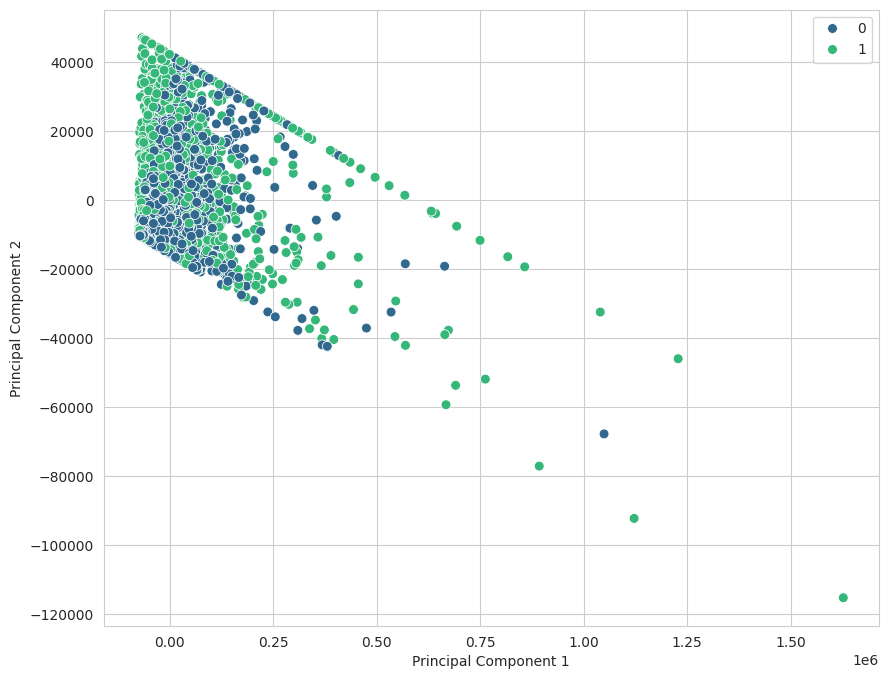

In [38]:
plt.figure(figsize=(10, 8))
if 'Award?' in df.columns:
    sns.scatterplot(x='Principal Component 1_', y='Principal Component 2_', hue='Award?', data=pca_df1, palette="viridis", s=50)
else:
    plt.scatter(pca_df1['Principal Component 1'], pca_df1['Principal Component 2'], c='blue', s=50)
    plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Award" if 'Type' in df.columns else "")
plt.show()

In [39]:
#1)Clusters (0 and 1):
#The plot shows two distinct clusters formed by the DBSCAN algorithm.
#Cluster 0 (dark blue) and Cluster 1 (green) represent groups with different patterns in the data based on the principal components.
#2)Cluster Separation:
#The clusters are well-separated in some regions, showing that DBSCAN effectively identified areas of high data density.
#However, there are a few points scattered further away, suggesting some potential outliers.
#Award vs. Non-Award Patterns:
#The clusters likely capture key differences between award winners (1) and non-winners (0).
#Cluster 1 seems to have more points spread out in wider areas, while Cluster 0 has a denser core.
#Outliers:
#DBSCAN might have identified some points as noise, but they aren't explicitly shown in this plot. (Noise points would have a cluster label of -1 in the DBSCAN output.)

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

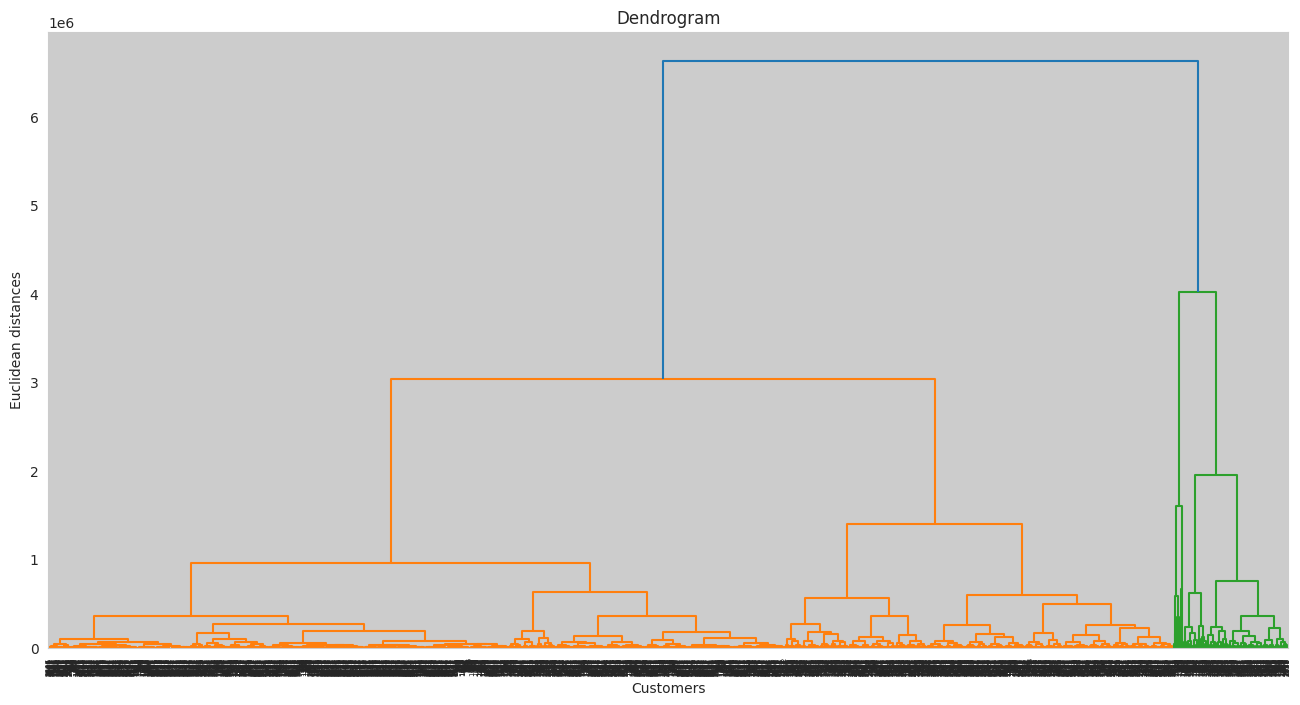

In [43]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
#X-axis (Customers):
#Each leaf on the x-axis represents an individual customer (or data point).
#The axis is densely populated, suggesting that the dataset contains a large number of points.
#Y-axis (Euclidean Distances):
#The height at which two clusters are merged reflects the Euclidean distance (or dissimilarity) between them.
#Higher merges indicate greater dissimilarity between clusters.
#Clusters Formation:
#At the lower levels of the dendrogram, points (or smaller groups) are merged into clusters based on similarity.
#As we move upwards, these clusters merge into larger clusters, continuing until all points are grouped into a single cluster (root of the dendrogram).
#Cut-off Point:
#You can choose the optimal number of clusters by drawing a horizontal line at a specific height.
#For example, cutting the dendrogram at a height where it splits into 2 main branches (blue and orange) would result in 2 clusters.
#Alternatively, cutting it at a lower height (near the green branches) will yield more clusters.

In [ ]:
#Optimal Number of Clusters:
#The ideal number of clusters depends on the domain and the "cut-off height."
#Based on the visual spread, cutting at a moderate height (e.g., where green branches are visible) might yield a reasonable number of clusters.
#Cluster Homogeneity:
#Lower merge heights indicate clusters with greater similarity.
#The taller orange-blue split suggests that the dataset's two largest groups differ significantly.
#Dissimilarity:
#Points merged at higher levels (e.g., orange to blue) are more dissimilar than those merged at lower levels (e.g., green branches).
#Interpretation:
#The dendrogram suggests a hierarchical structure in the data, with natural groupings that can be explored further by selecting the number of clusters.

